In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap


warnings.filterwarnings("ignore")

In [12]:
from sklearn.datasets import make_moons

features, labels = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [13]:
pd.DataFrame(features).head()

,0,1
0,-0.021371,0.406186
1,0.976700,-0.458323
2,0.904059,-0.376520
3,0.377363,-0.397037
4,-0.841926,0.530587


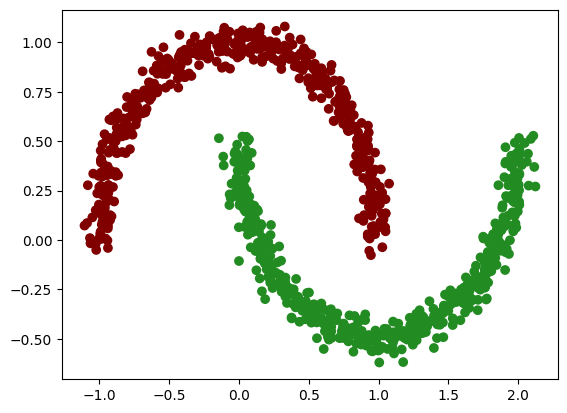

In [14]:
colors = ['maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(features[:,0], features[:,1], c=vectorizer(labels))

In [15]:
X = np.array(features)
y = np.array(labels)

X = np.column_stack((X, np.power(X[:,0], 2)))
X = np.column_stack((X, np.power(X[:,1], 2)))
X = np.column_stack((X, np.power(X[:,0], 3)))
X = np.column_stack((X, np.power(X[:,1], 3)))

#X = np.column_stack((X, X[:,1]*X[:,0]))
X

array([[-2.13712418e-02,  4.06186076e-01,  4.56729975e-04,
         1.64987128e-01, -9.76088671e-06,  6.70154743e-02],
       [ 9.76700451e-01, -4.58323065e-01,  9.53943771e-01,
         2.10060032e-01,  9.31717312e-01, -9.62753576e-02],
       [ 9.04058818e-01, -3.76519518e-01,  8.17322347e-01,
         1.41766948e-01,  7.38907475e-01, -5.33780229e-02],
       ...,
       [ 1.66258462e+00, -3.07919297e-01,  2.76418762e+00,
         9.48142937e-02,  4.59569582e+00, -2.91951507e-02],
       [-9.43558728e-01,  3.27893598e-01,  8.90303072e-01,
         1.07514212e-01, -8.40053234e-01,  3.52532218e-02],
       [ 7.94194061e-01,  6.07771713e-01,  6.30744207e-01,
         3.69386455e-01,  5.00933303e-01,  2.24502638e-01]])

In [16]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for Xi, target in zip(X, y):
                update = self.eta * (target - self.predict(Xi))
                self.w_[1:] += update * Xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, 0)

In [17]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min,x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), np.arange(x2_min,x2_max,resolution))
    
    Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel(),xx1.ravel()**2, xx2.ravel()**2,xx1.ravel()**3, xx2.ravel()**3]).T)
    Z =Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

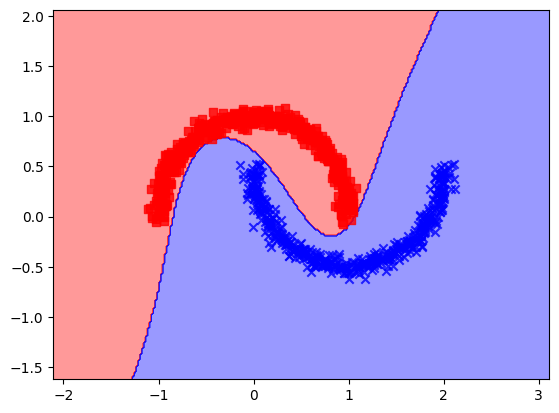

In [18]:
ppn = Perceptron(eta=0.001,n_iter=1500)
ppn.fit(X,y)
plot_decision_regions(X, y, classifier=ppn)
plt.show()